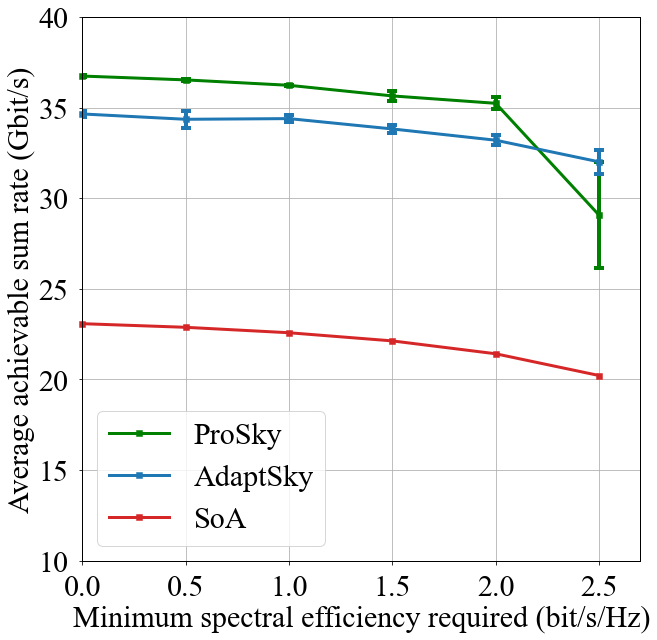

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from scipy import stats
import pickle

mpl.rcParams['axes.linewidth'] = 1
plt.rcParams.update({'font.size': 30})
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams["font.family"] = "Times New Roman"
plt.tick_params(axis='both', which='major', pad=10)
marker_style = dict(color='green', linestyle='-', marker='s', markeredgewidth=.5, linewidth=3, clip_on=False)
marker_style_2 = dict(color='tab:red', linestyle='-', marker='s', markeredgewidth=.5, linewidth=3, clip_on=False)
marker_style_3 = dict(color='tab:blue', linestyle='-', marker='s', markeredgewidth=.5, linewidth=3, clip_on=False)

Convex_d = {0 : [23.08],
            0.5 : [22.88],
            1: [22.58],
            1.5 : [22.13],
            2 : [21.42],
            2.5: [20.22]
             }


AdaptSky_d = {0 : [34.80, 34.85675, 34.61805, 34.49522, 34.44911, 34.70712],
            0.5 : [34.61, 33.37273, 34.63298, 34.80854, 34.58517, 34.15122],
            1   : [34.12, 34.61154, 34.61255, 34.5593, 34.17037, 34.30923],
            1.5 : [33.79, 33.42615, 33.8887, 33.92881, 34.0861, 33.84468],
            2 : [33.32, 33.18236, 32.59149, 33.35046, 33.42615, 33.36172],
            2.5: [32.22, 30.64051, 32.46426, 32.04853, 32.65006, 32.05531]
             }

AdaptSky_x = []
AdaptSky_y = []
AdaptSky_y1 = []

for key, value in AdaptSky_d.items():
    AdaptSky_x.append(key)
    AdaptSky_y.append(value)
    

a_CTEs = [np.mean(m) for m in AdaptSky_y]
a_error = [np.std(S) for S in AdaptSky_y]

Start_Reading = "Pickle/ProSky_d_1000gen.pickle"

with open(Start_Reading, "rb") as f:
        ProSky_d = pickle.load(f)
        
        
ProSky_x = []
ProSky_y = []
Convex_x = []
Convex_y = []

for key, value in ProSky_d.items():
    if key ==3:
        break
    ProSky_x.append(key)
    ProSky_y.append(value)
    
for key, value in Convex_d.items():
    Convex_x.append(key)
    Convex_y.append(value)

CTEs = [np.mean(m) for m in ProSky_y]
error = [np.std(S) for S in ProSky_y]

plt.plot(ProSky_x, CTEs , label="ProSky", **marker_style)
plt.errorbar(ProSky_x, CTEs, yerr = error, capsize=5, ecolor='green', color='green', elinewidth=4, capthick=4)

plt.plot(AdaptSky_x, a_CTEs , label="AdaptSky", **marker_style_3)
plt.errorbar(AdaptSky_x, a_CTEs, yerr = a_error, capsize=5, ecolor='tab:blue', elinewidth=4, capthick=4)

plt.plot(Convex_x, Convex_y, label="SoA", **marker_style_2)
plt.xticks(np.arange(-0, 3.1, 0.5))
plt.axis([0, 2.7, 10, 40])
plt.xlabel('Minimum spectral efficiency required (bit/s/Hz)')
plt.ylabel('Average achievable sum rate (Gbit/s)')
plt.legend(loc="best")
plt.grid()
plt.savefig('ProSky-minimum-SE-VS-SoA.pdf')
plt.show()

In [5]:
a = []
for i in range(len(CTEs)-1):
    print(AdaptSky_x[i])
    a.append((CTEs[i]-a_CTEs[i]))
    print(CTEs[i], a_CTEs[i])
print(np.mean(a))

0
36.745999999999995 34.654374999999995
0.5
36.534 34.36010666666667
1
36.236000000000004 34.397165
1.5
35.65 33.82740666666666
2
35.242000000000004 33.20536333333333
1.9927166666666694


[36.745999999999995,
 36.534,
 36.236000000000004,
 35.65,
 35.242000000000004,
 29.076000000000004]

[34.654374999999995,
 34.36010666666667,
 34.397165,
 33.82740666666666,
 33.20536333333333,
 32.01311166666667]

In [15]:
(CTEs[0]-a_CTEs[0])/a_CTEs[0] * 100

6.035673706422352